CIFAR-10

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

# Import modules

In [2]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import warnings
warnings.filterwarnings("ignore")

%load_ext jupyternotify

<IPython.core.display.Javascript object>

# Utils

In [3]:
def display_formatted_time(elapsed_time, msg=""):
    minutes, seconds = map(int, divmod(elapsed_time, 60))
    print("Elapsed time - {0}: {1}min {2}s".format(msg, minutes, seconds))

# Settings

In [4]:
SAVE_PATH = os.path.join(os.getcwd(), "models")

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)

torch.manual_seed(1)

batch_size = 20
test_batch_size = 20
epochs = 200
lr = 0.001
momentum = 0.9
log_interval = 2000

Device:  cuda


# Load image

In [5]:
trainset = torchvision.datasets.CIFAR10(root="../../data",
                                                                       train=True,
                                                                       download=True,
                                                                       transform = transforms.Compose([
                                                                           transforms.RandomHorizontalFlip(),
                                                                           transforms.ToTensor(),
                                                                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                                                       ]))
train_loader = torch.utils.data.DataLoader(trainset,
                                                                           batch_size=batch_size,
                                                                           shuffle=True,
                                                                           num_workers=2)

testset = torchvision.datasets.CIFAR10(root="../../data",
                                                                      train=False,
                                                                      download=True,
                                                                      transform = transforms.Compose([
                                                                           transforms.ToTensor(),
                                                                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                                                       ]))
test_loader = torch.utils.data.DataLoader(testset,
                                                                          batch_size=test_batch_size,
                                                                          shuffle=False)

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
)

Files already downloaded and verified
Files already downloaded and verified


plane   dog  deer  deer


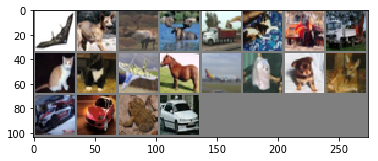

In [6]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

# データ詳細

In [7]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ../../data
    Transforms (if any): Compose(
                             RandomHorizontalFlip(p=0.5)
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

In [8]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: ../../data
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

# Define a Convolution Neural Network

In [9]:
# from net import Net

In [10]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,  self).__init__()
        self.conv1 = nn.Conv2d(3,  16,  5)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2,  2)
        self.conv2 = nn.Conv2d(16,  16,  5)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16 * 5 * 5,  120)
        self.fc2 = nn.Linear(120,  84)
        self.fc3 = nn.Linear(84,  10)

    def forward(self,  x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # 32x32x3 ->  28x28x6 ->14x14x6
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  #  ->10x10x16 -> 5x5x16
        x = x.view(-1,  16 * 5 * 5)  # -> 400
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

ResNet

# Train the network

In [10]:
since = time.time()

model = Net().to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),
                                         lr=lr,
                                         momentum=momentum)

optimizer = optim.Adam(model.parameters(),
                                            lr=lr)


for epoch in range(50):

    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % log_interval == (log_interval - 1):
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tRunningLoss: {:.3f}".format(
                epoch, batch_idx * len(inputs), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), running_loss / log_interval
            ))
            running_loss = 0.0

display_formatted_time(time.time() - since)

Train Epoch: 0 [7996/50000 (16%)]	Loss: 1.182348	RunningLoss: 1.857
Train Epoch: 0 [15996/50000 (32%)]	Loss: 1.101915	RunningLoss: 1.615
Train Epoch: 0 [23996/50000 (48%)]	Loss: 1.794667	RunningLoss: 1.537
Train Epoch: 0 [31996/50000 (64%)]	Loss: 1.814535	RunningLoss: 1.508
Train Epoch: 0 [39996/50000 (80%)]	Loss: 0.815840	RunningLoss: 1.442
Train Epoch: 0 [47996/50000 (96%)]	Loss: 2.413155	RunningLoss: 1.397
Train Epoch: 1 [7996/50000 (16%)]	Loss: 1.658571	RunningLoss: 1.325
Train Epoch: 1 [15996/50000 (32%)]	Loss: 1.114823	RunningLoss: 1.321
Train Epoch: 1 [23996/50000 (48%)]	Loss: 1.836716	RunningLoss: 1.262
Train Epoch: 1 [31996/50000 (64%)]	Loss: 1.664032	RunningLoss: 1.261
Train Epoch: 1 [39996/50000 (80%)]	Loss: 0.623952	RunningLoss: 1.240
Train Epoch: 1 [47996/50000 (96%)]	Loss: 1.372205	RunningLoss: 1.217
Train Epoch: 2 [7996/50000 (16%)]	Loss: 1.888860	RunningLoss: 1.180
Train Epoch: 2 [15996/50000 (32%)]	Loss: 0.929264	RunningLoss: 1.149
Train Epoch: 2 [23996/50000 (48%)]	Lo

Train Epoch: 19 [47996/50000 (96%)]	Loss: 1.396763	RunningLoss: 0.822
Train Epoch: 20 [7996/50000 (16%)]	Loss: 0.748518	RunningLoss: 0.791
Train Epoch: 20 [15996/50000 (32%)]	Loss: 0.525852	RunningLoss: 0.793
Train Epoch: 20 [23996/50000 (48%)]	Loss: 0.550734	RunningLoss: 0.801
Train Epoch: 20 [31996/50000 (64%)]	Loss: 1.355469	RunningLoss: 0.814
Train Epoch: 20 [39996/50000 (80%)]	Loss: 0.631508	RunningLoss: 0.795
Train Epoch: 20 [47996/50000 (96%)]	Loss: 1.108781	RunningLoss: 0.827
Train Epoch: 21 [7996/50000 (16%)]	Loss: 1.468338	RunningLoss: 0.764
Train Epoch: 21 [15996/50000 (32%)]	Loss: 0.663339	RunningLoss: 0.777
Train Epoch: 21 [23996/50000 (48%)]	Loss: 0.191532	RunningLoss: 0.793
Train Epoch: 21 [31996/50000 (64%)]	Loss: 0.372767	RunningLoss: 0.801
Train Epoch: 21 [39996/50000 (80%)]	Loss: 0.291556	RunningLoss: 0.812
Train Epoch: 21 [47996/50000 (96%)]	Loss: 0.741370	RunningLoss: 0.823
Train Epoch: 22 [7996/50000 (16%)]	Loss: 0.418774	RunningLoss: 0.768
Train Epoch: 22 [15996/

Train Epoch: 39 [31996/50000 (64%)]	Loss: 0.446138	RunningLoss: 0.743
Train Epoch: 39 [39996/50000 (80%)]	Loss: 0.043855	RunningLoss: 0.738
Train Epoch: 39 [47996/50000 (96%)]	Loss: 1.069704	RunningLoss: 0.745
Train Epoch: 40 [7996/50000 (16%)]	Loss: 0.642201	RunningLoss: 0.706
Train Epoch: 40 [15996/50000 (32%)]	Loss: 0.641175	RunningLoss: 0.719
Train Epoch: 40 [23996/50000 (48%)]	Loss: 1.441547	RunningLoss: 0.732
Train Epoch: 40 [31996/50000 (64%)]	Loss: 0.457592	RunningLoss: 0.747
Train Epoch: 40 [39996/50000 (80%)]	Loss: 0.291698	RunningLoss: 0.755
Train Epoch: 40 [47996/50000 (96%)]	Loss: 0.480400	RunningLoss: 0.752
Train Epoch: 41 [7996/50000 (16%)]	Loss: 0.200635	RunningLoss: 0.722
Train Epoch: 41 [15996/50000 (32%)]	Loss: 1.437093	RunningLoss: 0.748
Train Epoch: 41 [23996/50000 (48%)]	Loss: 0.317456	RunningLoss: 0.750
Train Epoch: 41 [31996/50000 (64%)]	Loss: 1.382012	RunningLoss: 0.721
Train Epoch: 41 [39996/50000 (80%)]	Loss: 0.927784	RunningLoss: 0.753
Train Epoch: 41 [47996

## Save model

In [21]:
model_path = os.path.join(SAVE_PATH, "original_adam_epoch50")
torch.save(model.state_dict(), model_path)

## Load model

In [22]:
model = Net().to(device)
model.load_state_dict(torch.load(model_path))

# Test the network on the test data

GroundTruth:    cat  ship  ship plane


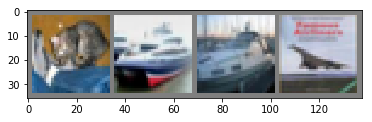

In [24]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", " ".join("%5s" % classes[labels[j]] for j in range(4)))

In [25]:
outputs = model(images.to(device))

In [26]:
_, predicted = torch.max(outputs, 1)
print("Predicted: ", " ".join("%5s" % classes[predicted[j]] for j in range(4)))
print(outputs.data, predicted)

Predicted:    cat  ship  ship plane
tensor([[-14.8833, -13.5896, -12.1473,  -9.4422, -11.2745, -11.6010, -12.0003,
         -16.3104, -14.8559, -14.0906],
        [-17.3171, -16.8443, -23.3243, -27.6987, -23.4220, -26.1010, -23.0940,
         -27.3977, -12.9758, -19.9042],
        [ -7.0764,  -7.8473,  -9.7063, -10.6911,  -7.9539, -12.2411, -10.5146,
         -10.7956,  -5.9058,  -6.6564],
        [ -6.7987, -13.7726,  -9.0717, -12.9386,  -8.1760, -14.5545, -11.5237,
         -13.9655,  -9.5636, -12.6991]], device='cuda:0') tensor([3, 8, 8, 0], device='cuda:0')


In [57]:
correct = 0
total = 0
with torch.no_grad():
    for (inputs, labels) in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("Accuracy of the network on the 10000 test images: %d %%" % (100 * correct / total))

Accuracy of the network on the 10000 test images: 70 %


In [28]:
predicted

tensor([3, 5, 1, 7], device='cuda:0')

In [53]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print("Accuracy of %5s : %2d %%" % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 77 %
Accuracy of   car : 86 %
Accuracy of  bird : 62 %
Accuracy of   cat : 54 %
Accuracy of  deer : 74 %
Accuracy of   dog : 62 %
Accuracy of  frog : 82 %
Accuracy of horse : 77 %
Accuracy of  ship : 84 %
Accuracy of truck : 82 %


# Learning rate annealing

Cosine Annealing

In [55]:
since = time.time()

model = Net().to(device)
criterion = nn.CrossEntropyLoss()

# optimizer = optim.SGD(model.parameters(),
#                                          lr=lr,
#                                          momentum=momentum)
optimizer = optim.Adam(model.parameters(),
                                            lr=lr)

scheduler = lr_scheduler.CosineAnnealingLR(optimizer=optimizer,
                                                                              T_max=10,  # Maximum number of iterations
                                                                              eta_min=0,  # 最小学習率
                                                                              last_epoch=-1)  # The index of last epoch


for epoch in range(epochs):

    scheduler.step()
    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % log_interval == (log_interval - 1):
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tRunningLoss: {:.3f}".format(
                epoch, batch_idx * len(inputs), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), running_loss / log_interval
            ))
            running_loss = 0.0

display_formatted_time(time.time() - since)

Train Epoch: 0 [39980/50000 (80%)]	Loss: 1.261632	RunningLoss: 1.493
Train Epoch: 1 [39980/50000 (80%)]	Loss: 1.009161	RunningLoss: 1.166
Train Epoch: 2 [39980/50000 (80%)]	Loss: 1.295659	RunningLoss: 1.046
Train Epoch: 3 [39980/50000 (80%)]	Loss: 0.864393	RunningLoss: 0.959
Train Epoch: 4 [39980/50000 (80%)]	Loss: 0.633997	RunningLoss: 0.890
Train Epoch: 5 [39980/50000 (80%)]	Loss: 0.861378	RunningLoss: 0.842
Train Epoch: 6 [39980/50000 (80%)]	Loss: 0.516749	RunningLoss: 0.797
Train Epoch: 7 [39980/50000 (80%)]	Loss: 0.575823	RunningLoss: 0.757
Train Epoch: 8 [39980/50000 (80%)]	Loss: 0.517675	RunningLoss: 0.732
Train Epoch: 9 [39980/50000 (80%)]	Loss: 0.738847	RunningLoss: 0.720
Train Epoch: 10 [39980/50000 (80%)]	Loss: 0.748805	RunningLoss: 0.715
Train Epoch: 11 [39980/50000 (80%)]	Loss: 0.669760	RunningLoss: 0.711
Train Epoch: 12 [39980/50000 (80%)]	Loss: 0.749527	RunningLoss: 0.725
Train Epoch: 13 [39980/50000 (80%)]	Loss: 0.897572	RunningLoss: 0.730
Train Epoch: 14 [39980/50000 (

Train Epoch: 117 [39980/50000 (80%)]	Loss: 0.242372	RunningLoss: 0.436
Train Epoch: 118 [39980/50000 (80%)]	Loss: 1.058945	RunningLoss: 0.444
Train Epoch: 119 [39980/50000 (80%)]	Loss: 0.432002	RunningLoss: 0.462
Train Epoch: 120 [39980/50000 (80%)]	Loss: 0.689705	RunningLoss: 0.460
Train Epoch: 121 [39980/50000 (80%)]	Loss: 0.396888	RunningLoss: 0.464
Train Epoch: 122 [39980/50000 (80%)]	Loss: 0.447411	RunningLoss: 0.449
Train Epoch: 123 [39980/50000 (80%)]	Loss: 0.304158	RunningLoss: 0.434
Train Epoch: 124 [39980/50000 (80%)]	Loss: 0.472837	RunningLoss: 0.412
Train Epoch: 125 [39980/50000 (80%)]	Loss: 0.328462	RunningLoss: 0.393
Train Epoch: 126 [39980/50000 (80%)]	Loss: 0.224208	RunningLoss: 0.367
Train Epoch: 127 [39980/50000 (80%)]	Loss: 0.109467	RunningLoss: 0.345
Train Epoch: 128 [39980/50000 (80%)]	Loss: 0.349054	RunningLoss: 0.331
Train Epoch: 129 [39980/50000 (80%)]	Loss: 0.160555	RunningLoss: 0.323
Train Epoch: 130 [39980/50000 (80%)]	Loss: 0.242860	RunningLoss: 0.313
Train 

In [58]:
model_path = os.path.join(SAVE_PATH, "original_Adam_CosineAnnealing_batchsize20_epoch200")
torch.save(model.state_dict(), model_path)

In [ ]:
model = Net().to(device)
model.load_state_dict(torch.load(model_path))

In [42]:
import time
time.sleep(5)
%notify -m "slept for 5 seconds."
time.sleep(6)
%notify -m "slept for 6 seconds."
time.sleep(2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

StepLR

In [16]:
since = time.time()

model = Net().to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),
                                         lr=lr,
                                         momentum=momentum)

scheduler = lr_scheduler.StepLR(optimizer=optimizer,
                                                     step_size=10,
                                                     gamma=0.9)


for epoch in range(50):

    scheduler.step()
    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % log_interval == (log_interval - 1):
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tRunningLoss: {:.3f}".format(
                epoch, batch_idx * len(inputs), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), running_loss / log_interval
            ))
            running_loss = 0.0

display_formatted_time(time.time() - since)

Train Epoch: 0 [7996/50000 (16%)]	Loss: 2.098070	RunningLoss: 2.011
Train Epoch: 0 [15996/50000 (32%)]	Loss: 2.257834	RunningLoss: 1.728
Train Epoch: 0 [23996/50000 (48%)]	Loss: 1.788056	RunningLoss: 1.621
Train Epoch: 0 [31996/50000 (64%)]	Loss: 0.901697	RunningLoss: 1.546
Train Epoch: 0 [39996/50000 (80%)]	Loss: 1.442130	RunningLoss: 1.482
Train Epoch: 0 [47996/50000 (96%)]	Loss: 0.921931	RunningLoss: 1.460
Train Epoch: 1 [7996/50000 (16%)]	Loss: 1.112370	RunningLoss: 1.383
Train Epoch: 1 [15996/50000 (32%)]	Loss: 0.955720	RunningLoss: 1.358
Train Epoch: 1 [23996/50000 (48%)]	Loss: 0.486815	RunningLoss: 1.331
Train Epoch: 1 [31996/50000 (64%)]	Loss: 1.026662	RunningLoss: 1.286
Train Epoch: 1 [39996/50000 (80%)]	Loss: 2.390281	RunningLoss: 1.285
Train Epoch: 1 [47996/50000 (96%)]	Loss: 1.929995	RunningLoss: 1.259
Train Epoch: 2 [7996/50000 (16%)]	Loss: 1.470835	RunningLoss: 1.229
Train Epoch: 2 [15996/50000 (32%)]	Loss: 1.237993	RunningLoss: 1.192
Train Epoch: 2 [23996/50000 (48%)]	Lo

Train Epoch: 19 [47996/50000 (96%)]	Loss: 0.720386	RunningLoss: 0.729
Train Epoch: 20 [7996/50000 (16%)]	Loss: 1.173284	RunningLoss: 0.677
Train Epoch: 20 [15996/50000 (32%)]	Loss: 0.784114	RunningLoss: 0.685
Train Epoch: 20 [23996/50000 (48%)]	Loss: 0.518505	RunningLoss: 0.700
Train Epoch: 20 [31996/50000 (64%)]	Loss: 0.304363	RunningLoss: 0.713
Train Epoch: 20 [39996/50000 (80%)]	Loss: 1.043183	RunningLoss: 0.678
Train Epoch: 20 [47996/50000 (96%)]	Loss: 0.662193	RunningLoss: 0.702
Train Epoch: 21 [7996/50000 (16%)]	Loss: 0.903558	RunningLoss: 0.670
Train Epoch: 21 [15996/50000 (32%)]	Loss: 0.429706	RunningLoss: 0.696
Train Epoch: 21 [23996/50000 (48%)]	Loss: 0.211257	RunningLoss: 0.688
Train Epoch: 21 [31996/50000 (64%)]	Loss: 0.472112	RunningLoss: 0.691
Train Epoch: 21 [39996/50000 (80%)]	Loss: 0.043472	RunningLoss: 0.683
Train Epoch: 21 [47996/50000 (96%)]	Loss: 0.513240	RunningLoss: 0.701
Train Epoch: 22 [7996/50000 (16%)]	Loss: 0.137243	RunningLoss: 0.665
Train Epoch: 22 [15996/

Train Epoch: 39 [31996/50000 (64%)]	Loss: 0.281081	RunningLoss: 0.593
Train Epoch: 39 [39996/50000 (80%)]	Loss: 0.094843	RunningLoss: 0.587
Train Epoch: 39 [47996/50000 (96%)]	Loss: 0.237711	RunningLoss: 0.591
Train Epoch: 40 [7996/50000 (16%)]	Loss: 0.465368	RunningLoss: 0.544
Train Epoch: 40 [15996/50000 (32%)]	Loss: 0.087800	RunningLoss: 0.536
Train Epoch: 40 [23996/50000 (48%)]	Loss: 0.196630	RunningLoss: 0.594
Train Epoch: 40 [31996/50000 (64%)]	Loss: 1.932331	RunningLoss: 0.576
Train Epoch: 40 [39996/50000 (80%)]	Loss: 0.186853	RunningLoss: 0.546
Train Epoch: 40 [47996/50000 (96%)]	Loss: 0.005664	RunningLoss: 0.591
Train Epoch: 41 [7996/50000 (16%)]	Loss: 1.446240	RunningLoss: 0.530
Train Epoch: 41 [15996/50000 (32%)]	Loss: 0.686665	RunningLoss: 0.549
Train Epoch: 41 [23996/50000 (48%)]	Loss: 1.349575	RunningLoss: 0.568
Train Epoch: 41 [31996/50000 (64%)]	Loss: 1.183655	RunningLoss: 0.564
Train Epoch: 41 [39996/50000 (80%)]	Loss: 0.371780	RunningLoss: 0.579
Train Epoch: 41 [47996

# Transfer Learning

## Finetuning ResNet-18

In [59]:
trainset = torchvision.datasets.CIFAR10(root="../../data",
                                                                       train=True,
                                                                       download=True,
                                                                       transform=transforms.Compose([
                                                                           transforms.RandomResizedCrop(224),
                                                                           transforms.RandomHorizontalFlip(),
                                                                           transforms.ToTensor(),
                                                                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                                                       ]))
train_loader = torch.utils.data.DataLoader(trainset,
                                                                           batch_size=batch_size,
                                                                           shuffle=True,
                                                                           num_workers=2)

testset = torchvision.datasets.CIFAR10(root="../../data",
                                                                      train=False,
                                                                      download=True,
                                                                       transform=transforms.Compose([
                                                                           transforms.Resize(256),
                                                                           transforms.RandomResizedCrop(224),
                                                                           transforms.ToTensor(),
                                                                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                                                       ]))
test_loader = torch.utils.data.DataLoader(testset,
                                                                          batch_size=test_batch_size,
                                                                          shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [1]:
model_ft = models.resnet18(pretrained=True)
# model_ft = models.resnet18(pretrained=False)

num_ftrs = model_ft.fc.in_features

model_ft.conv1 = nn.Conv2d(in_channels=3,
                                                    out_channels=64,
                                                    kernel_size=7,
                                                    stride=2,
                                                    padding=3,
                                                    bias=False)
model_ft.fc = nn.Linear(num_ftrs, 10)

model_ft = model_ft.to(device)
print(model_ft)

optimizer_ft = optim.SGD(model_ft.parameters(),
                                              lr=lr,
                                              momentum=momentum)

NameError: name 'models' is not defined

In [ ]:
since = time.time()

for epoch in range(epochs):

    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % log_interval == (log_interval - 1):
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tRunningLoss: {:.3f}".format(
                epoch, batch_idx * len(inputs), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), running_loss / log_interval
            ))
            running_loss = 0.0

display_formatted_time(time.time() - since)

In [ ]:
since = time.time()

correct = 0
total = 0
with torch.no_grad():
    for (inputs, labels) in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("Accuracy of the network on the 10000 test images: %d %%" % (100 * correct / total))

display_formatted_time(time.time() - since)

### Fixed feature extractor

In [17]:
model_ft = models.resnet18(pretrained=True)
for param in model_ft.parameters():
    param.requires_grad = False

num_ftrs = model_ft.fc.in_features
model_ft.conv1 = nn.Conv2d(in_channels=3,
                                                    out_channels=64,
                                                    kernel_size=7,
                                                    stride=2,
                                                    padding=3,
                                                    bias=False)
model_ft.fc = nn.Linear(num_ftrs, 10)

model_ft = model_ft.to(device)
print(model_ft)

optimizer_ft = optim.SGD(model_ft.parameters(),
                                              lr=lr,
                                              momentum=momentum)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [ ]:
since = time.time()

for epoch in range(epochs):

    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        exp_lr_scheduler.step()

        running_loss += loss.item()
        if batch_idx % log_interval == (log_interval - 1):
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tRunningLoss: {:.3f}".format(
                epoch, batch_idx * len(inputs), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), running_loss / log_interval
            ))
            running_loss = 0.0

display_formatted_time(time.time() - since)

In [160]:
since = time.time()

correct = 0
total = 0
with torch.no_grad():
    for (inputs, labels) in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("Accuracy of the network on the 10000 test images: %d %%" % (100 * correct / total))

display_formatted_time(time.time() - since)

Accuracy of the network on the 10000 test images: 8 %
Elapsed time - : 0min 26s


## Finetuning VGG

In [37]:
model_ft = models.vgg16(pretrained=True)
for param in model_ft.parameters():
    param.requires_grad = False

num_ftrs = model_ft.classifier[6].in_features

model_ft.classifier[6] = nn.Linear(num_ftrs, 10)

model_ft = model_ft.to(device)
print(model_ft)

optimizer_ft = optim.SGD(model_ft.parameters(),
                                              lr=lr,
                                              momentum=momentum)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [38]:
since = time.time()

for epoch in range(epochs):

    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        exp_lr_scheduler.step()

        running_loss += loss.item()
        if batch_idx % log_interval == (log_interval - 1):
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tRunningLoss: {:.3f}".format(
                epoch, batch_idx * len(inputs), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), running_loss / log_interval
            ))
            running_loss = 0.0

display_formatted_time(time.time() - since)

Train Epoch: 0 [7996/50000 (16%)]	Loss: 2.159346	RunningLoss: 2.387
Train Epoch: 0 [15996/50000 (32%)]	Loss: 2.379969	RunningLoss: 2.390
Train Epoch: 0 [23996/50000 (48%)]	Loss: 2.332590	RunningLoss: 2.394
Train Epoch: 0 [31996/50000 (64%)]	Loss: 2.595869	RunningLoss: 2.391
Train Epoch: 0 [39996/50000 (80%)]	Loss: 2.534103	RunningLoss: 2.386
Train Epoch: 0 [47996/50000 (96%)]	Loss: 2.623924	RunningLoss: 2.388
Train Epoch: 1 [7996/50000 (16%)]	Loss: 2.777625	RunningLoss: 2.381
Train Epoch: 1 [15996/50000 (32%)]	Loss: 2.251991	RunningLoss: 2.390
Train Epoch: 1 [23996/50000 (48%)]	Loss: 2.551284	RunningLoss: 2.396
Train Epoch: 1 [31996/50000 (64%)]	Loss: 2.533488	RunningLoss: 2.397
Train Epoch: 1 [39996/50000 (80%)]	Loss: 2.538293	RunningLoss: 2.386
Train Epoch: 1 [47996/50000 (96%)]	Loss: 2.136362	RunningLoss: 2.382
Elapsed time - : 11min 39s


In [12]:
since = time.time()

correct = 0
total = 0
with torch.no_grad():
    for (inputs, labels) in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("Accuracy of the network on the 10000 test images: %d %%" % (100 * correct / total))

display_formatted_time(time.time() - since)

NameError: name 'model_ft' is not defined

In [41]:
print(labels)
print(outputs)

tensor([8, 7, 1, 9], device='cuda:0')
tensor([[-0.0806, -0.0588, -0.0060, -0.0684,  0.5789, -0.2355,  0.0837,  0.1491,
          0.3314,  0.1944],
        [ 0.1758, -0.4445,  0.3566,  0.0683,  0.2534,  0.4132, -0.0509,  0.3535,
          0.0414, -0.1509],
        [-0.3567, -0.2181, -0.7075,  0.2487, -0.4086, -0.2820,  0.2147, -0.0063,
          0.1472,  0.0601],
        [ 0.3038, -0.3477, -0.2707,  0.1142,  0.3598,  0.2226, -0.0590,  0.2238,
          0.0006, -0.0278]], device='cuda:0', grad_fn=<ThAddmmBackward>)
